<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/Convolutional%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

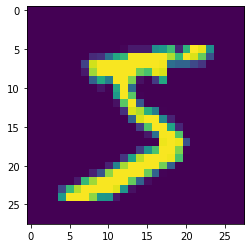

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [28]:
y_test.shape

(10000,)

In [12]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_test.shape

(10000, 10)

In [13]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_train.shape

(60000, 10)

In [14]:
x_train = x_train/255

In [15]:
x_test = x_test/255

In [16]:
scaled_image = x_train[0]

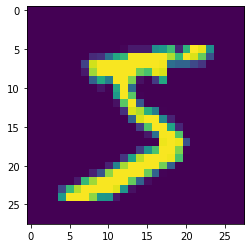

In [17]:
plt.imshow(scaled_image)

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [27]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1358 - accuracy: 0.9591 - val_loss: 0.0486 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0422 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0368 - val_accuracy: 0.9890
